In [285]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [286]:
df = pd.read_excel("data/scraped_profiles.xlsx")

In [287]:
df.shape

(62573, 17)

In [288]:
df.columns

Index(['ID', 'Acceptance Rate', 'Institution', 'Program', 'Degree Type',
       'Degree's Country of Origin', 'Decision', 'Notification Date',
       'Notification Method', 'Undergrad GPA', 'GRE General', 'GRE Verbal',
       'Analytical Writing', 'Notes', 'Timeline Event', 'Timeline Date',
       'Scraped Timestamp'],
      dtype='object')

In [289]:
df = df.rename(columns={
    "ID": "id",
    "Acceptance Rate": "acceptance_rate",
    "Institution": "institution",
    "Program": "program",
    "Degree Type": "degree_type",
    "Degree's Country of Origin": "degree_origin_country",
    "Decision": "decision",
    "Notification Date": "notification_date",
    "Notification Method": "notification_method",
    "Undergrad GPA": "undergrad_gpa",
    "GRE General": "gre_general",
    "GRE Verbal": "gre_verbal",
    "Analytical Writing": "analytical_writing",
    "Notes": "notes",
    "Timeline Event": "timeline_event",
    "Timeline Date": "timeline_date",
    "Scraped Timestamp": "scraped_timestamp"
})


In [290]:
df.columns

Index(['id', 'acceptance_rate', 'institution', 'program', 'degree_type',
       'degree_origin_country', 'decision', 'notification_date',
       'notification_method', 'undergrad_gpa', 'gre_general', 'gre_verbal',
       'analytical_writing', 'notes', 'timeline_event', 'timeline_date',
       'scraped_timestamp'],
      dtype='object')

In [291]:
drop_columns = ["degree_origin_country", "notification_date", "notification_method", "timeline_event", "timeline_date", "scraped_timestamp"]

In [292]:
df = df.drop(columns=drop_columns)

In [293]:
df.columns

Index(['id', 'acceptance_rate', 'institution', 'program', 'degree_type',
       'decision', 'undergrad_gpa', 'gre_general', 'gre_verbal',
       'analytical_writing', 'notes'],
      dtype='object')

In [ ]:
df['gre_total'] = df['gre_general'] + df['gre_verbal']

In [294]:
df.describe()

id acceptance_rate               institution           program  \
count    62561           61487                     62561             62518   
unique   62238             169                      1597              4979   
top     985544             40%  University of California  Computer Science   
freq        12            3767                      2582              4095   

       degree_type  decision  undergrad_gpa  gre_general  gre_verbal  \
count        62561     62561          33005         6955        6094   
unique          10         8            304          128          69   
top            PhD  Rejected              4          170         162   
freq         43664     24204           4183         1292         437   

        analytical_writing                  notes  
count                 5655                  32319  
unique                  89                  29372  
top                      4  Email to check portal  
freq                  1619                    178

In [295]:
# for index, rows in df.iterrows():
#     print(rows.values)

In [296]:
# Step 1: Find duplicate IDs
duplicate_ids = df[df.duplicated('id', keep=False)]

In [297]:
# Convert ID to string to ensure consistent type
duplicate_ids['id'] = duplicate_ids['id'].astype(str)

# Step 2: Sort by 'id' to group duplicates together
duplicate_ids_sorted = duplicate_ids.sort_values(by='id')


/var/folders/dw/fn12lc3x2b317ydc5b70v2340000gn/T/ipykernel_19133/1242935658.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [298]:
# Step 3: Inspect all rows with the same id
# You can group them and print each group for manual comparison
for dup_id, group in duplicate_ids_sorted.groupby('id'):
    if len(group) > 1:
        print(f"\nDuplicate ID: {dup_id}")
        print(group)


Duplicate ID: 871567
          id acceptance_rate       institution      program degree_type  \
9792  871567             24%  Emory University  Art History         PhD   
6976  871567             24%  Emory University  Art History         PhD   

       decision undergrad_gpa gre_general gre_verbal analytical_writing notes  
9792  Interview          3.93         NaN        NaN                NaN   NaN  
6976  Interview          3.93         NaN        NaN                NaN   NaN  

Duplicate ID: 871568
          id acceptance_rate             institution              program  \
9791  871568             34%  University of Hartford  Clinical Psychology   
6975  871568             34%  University of Hartford  Clinical Psychology   

     degree_type   decision undergrad_gpa gre_general gre_verbal  \
9791        PsyD  Interview           3.5         NaN        NaN   
6975        PsyD  Interview           3.5         NaN        NaN   

     analytical_writing                              

In [299]:
# Remove rows that are exact duplicates (all columns identical)
df = df.drop_duplicates()


In [300]:
df.describe()

id acceptance_rate               institution           program  \
count    62241           61167                     62241             62198   
unique   62238             169                      1597              4979   
top     964031             40%  University of California  Computer Science   
freq         2            3764                      2582              4061   

       degree_type  decision  undergrad_gpa  gre_general  gre_verbal  \
count        62241     62241          32834         6926        6076   
unique          10         8            304          128          69   
top            PhD  Rejected              4          170         162   
freq         43482     24022           4172         1292         437   

        analytical_writing                  notes  
count                 5633                  32139  
unique                  89                  29372  
top                      4  Email to check portal  
freq                  1615                    178

In [301]:
duplicate_ids = df[df.duplicated('id', keep=False)]


In [302]:
print(duplicate_ids.sort_values(by='id'))


           id acceptance_rate                              institution  \
15400  964029            0.32                 University of California   
57055  964029             32%                 University of California   
15399  964030            0.66  Teachers College at Columbia University   
57054  964030             66%  Teachers College at Columbia University   
15398  964031            0.44          Georgia Institute of Technology   
57053  964031             44%          Georgia Institute of Technology   

                                   program degree_type  decision  \
15400                     Computer Science     Masters  Accepted   
57055                     Computer Science     Masters  Accepted   
15399      Urban Education Leaders Program         EdD  Accepted   
57054      Urban Education Leaders Program         EdD  Accepted   
15398  Electrical And Computer Engineering         PhD  Accepted   
57053  Electrical And Computer Engineering         PhD  Accepted   

    

In [303]:
df = df.drop_duplicates(subset='id', keep='first')

In [304]:
print(df['id'].duplicated().sum())  # Should print 0

0


In [305]:
df.describe()

id acceptance_rate               institution           program  \
count    62238           61164                     62238             62195   
unique   62238             169                      1597              4979   
top     879550             40%  University of California  Computer Science   
freq         1            3764                      2581              4060   

       degree_type  decision  undergrad_gpa  gre_general  gre_verbal  \
count        62238     62238          32831         6926        6076   
unique          10         8            304          128          69   
top            PhD  Rejected              4          170         162   
freq         43481     24022           4172         1292         437   

        analytical_writing                  notes  
count                 5633                  32139  
unique                  89                  29372  
top                      4  Email to check portal  
freq                  1615                    178

#### Let's preprocess each column

In [306]:
df.columns

Index(['id', 'acceptance_rate', 'institution', 'program', 'degree_type',
       'decision', 'undergrad_gpa', 'gre_general', 'gre_verbal',
       'analytical_writing', 'notes'],
      dtype='object')

### For acceptance rate, we cannot 

#### 1. Replace missing values with random numbers or 0

#### 2. Drop the rows (since those rows might have critical data like accepted applicants)



In [307]:
# First let's remove % symbol and then keep the NaN as NaN.
df['acceptance_rate_clean'] = pd.to_numeric(
    df['acceptance_rate'].str.replace('%', '', regex=False),
    errors='coerce'
)


In [308]:
acceptance_rate_max = df['acceptance_rate_clean'].max(skipna=True)
acceptance_rate_min = df['acceptance_rate_clean'].min(skipna=True)

print("Max:", acceptance_rate_max)
print("Min:", acceptance_rate_min)


Max: 100.0
Min: 6.0


In [309]:
# First let's remove % symbol and then keep the NaN as NaN.
df['acceptance_rate_clean'] = pd.to_numeric(
    df['acceptance_rate'].str.replace('%', '', regex=False),
    errors='coerce'
)


In [310]:
df['undergrad_gpa'] = pd.to_numeric(df['undergrad_gpa'], errors='coerce')

In [311]:
undergrad_gpa_max = df['undergrad_gpa'].max(skipna=True)
undergrad_gpa_min = df['undergrad_gpa'].min(skipna=True)

print("Max:", undergrad_gpa_max)
print("Min:", undergrad_gpa_min)


Max: 332.0
Min: 0.01


In [312]:
gpa_greater_than_equal_to_one = df.undergrad_gpa >= 1.0
gpa_less_than_equal_to_four = df.undergrad_gpa <= 4.0


In [313]:
valid_gpa_profiles = df[gpa_greater_than_equal_to_one & gpa_less_than_equal_to_four]
len(valid_gpa_profiles)

32493

In [314]:
invalid_gpa_profiles = df[~(gpa_greater_than_equal_to_one & gpa_less_than_equal_to_four)]
len(invalid_gpa_profiles)

29746

#### Sometimes the user may enter the gpa without the '.', hence we should check if someone has entered values between 100 to 332(since 332 is the vax value)

In [315]:
gpa_greater_than_equal_to_hundred = df['undergrad_gpa'] >= 100
gpa_less_than_equal_to_three_three_three = df['undergrad_gpa'] < 333
valid_gpa_profiles_above_hundred = df[gpa_greater_than_equal_to_hundred & gpa_less_than_equal_to_three_three_three]
valid_gpa_profiles_above_hundred
condition = (df['undergrad_gpa'] >= 100) & (df['undergrad_gpa'] < 332)

In [316]:
df['undergrad_gpa'] = df['undergrad_gpa'].mask(df['undergrad_gpa'] == condition, df['undergrad_gpa'] / 100)

In [317]:
valid_gpa_profiles_above_hundred = df[gpa_greater_than_equal_to_hundred & gpa_less_than_equal_to_three_three_three]
len(valid_gpa_profiles_above_hundred)

1

### The GRE General Test has three scored sections, each with its own score range:

#### Verbal Reasoning : Score range: 130 to 170

#### Quantitative Reasoning : Score range: 130 to 170

#### Analytical Writing : Score range: 0 to 6 

In [318]:
df.columns

Index(['id', 'acceptance_rate', 'institution', 'program', 'degree_type',
       'decision', 'undergrad_gpa', 'gre_general', 'gre_verbal',
       'analytical_writing', 'notes', 'acceptance_rate_clean'],
      dtype='object')

In [319]:
df['gre_general'] = pd.to_numeric(df['gre_general'], errors = 'coerce')

In [320]:
gre_score_general_min = df['gre_general'] >= 130.0
gre_score_general_max = df['gre_general'] <= 170.0
valid_gre_general_profiles = df[gre_score_general_min & gre_score_general_max]
len(valid_gre_general_profiles)

5425

In [332]:

invalid_gre_general_profiles = df[~(gre_score_general_min & gre_score_general_max) & ~df['gre_general'].isna()]
len(invalid_gre_general_profiles)

1014

### Approach
Maybe a person entered their entire score instead of gre general. In that case the score boundary should be within 260 to 340. Else if it exceeds that then the same is neglected.

In [ ]:
invalid_gre_general_profiles = df[~(gre_score_general_min & gre_score_general_max) & ~df['gre_general'].isna()]


#### There are no invalid profiles of gre general

In [322]:
gre_score_verbal_min = df['gre_general'] >= 130
gre_score_verbal_max = df['gre_general'] <= 170
valid_gre_verbal_profiles = df[gre_score_verbal_min & gre_score_verbal_max]
len(valid_gre_verbal_profiles)

5425

In [323]:
condition = (df['undergrad_gpa'] >= 130) & (df['undergrad_gpa'] < 171)

In [324]:
df['gre_verbal'] = pd.to_numeric(df['gre_verbal'], errors = 'coerce')

In [325]:
gre_score_general_min = df['gre_verbal'] >= 130
gre_score_general_max = df['gre_verbal'] <= 170

In [326]:
df['analytical_writing'] = pd.to_numeric(df['analytical_writing'], errors = 'coerce')

In [327]:
gre_analytical_writing_min = df['analytical_writing'] >= 0.0
gre_analytical_writing_max = df['analytical_writing'] >= 6.0

### Correlation between different variables and their visualisation

In [328]:
# Convert relevant fields
df['decision_encoded'] = df['decision'].map({
    'Accepted': 1,
    'Rejected': 0,
    'Interview': 0.5,  # optional: if you want to include partial decision stages
    'Waitlisted': 0.25,
    'Other': None
})


In [329]:
# Select columns for correlation
corr_cols = ['decision_encoded', 'undergrad_gpa', 'gre_general', 'gre_verbal', 'analytical_writing']
df_corr = df[corr_cols].dropna()
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

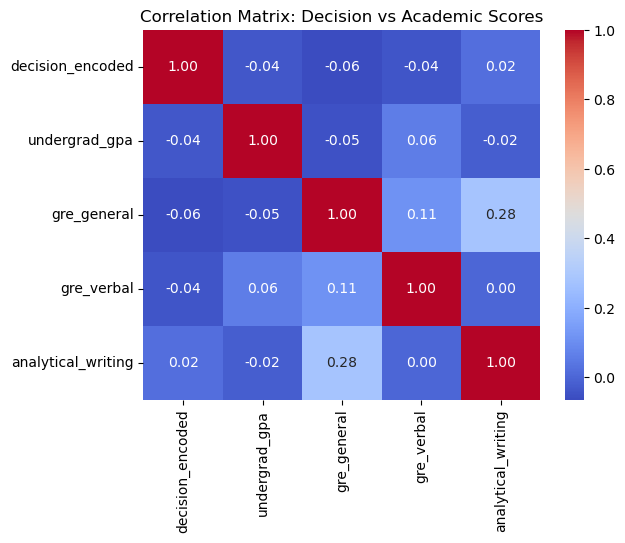

In [330]:
# Compute and plot correlation matrix
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Decision vs Academic Scores")
plt.show()

In [331]:
for col in ['undergrad_gpa', 'gre_total', 'gre_verbal', 'analytical_writing']:
    fig = px.histogram(df, x=col, marginal="box", color='decision',
                       title=f"{col} vs Decision",
                       color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_layout(bargap=0.2)
    fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['id', 'acceptance_rate', 'institution', 'program', 'degree_type', 'decision', 'undergrad_gpa', 'gre_general', 'gre_verbal', 'analytical_writing', 'notes', 'acceptance_rate_clean', 'decision_encoded'] but received: gre_total

In [ ]:
# degree_type vs decision
fig = px.histogram(df, x='degree_type', color='decision',
                   title='Degree Type vs Decision',
                   color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [ ]:
# degree_type vs program
fig = px.histogram(df, x='degree_type', color='program',
                   title='Degree Type vs Program',
                   color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()


In [ ]:
df['acceptance_rate_numeric'] = df['acceptance_rate'].str.rstrip('%').astype(float)

fig = px.box(df, x='institution', y='acceptance_rate_numeric',
             title='Acceptance Rate by Institution')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


ValueError: could not convert string to float: 'Acceptance Rate'

In [ ]:
fig = px.histogram(df, x='acceptance_rate_numeric', color='institution',
                   title='Acceptance Rate Distribution per Institution',
                   marginal='box')
fig.show()


In [ ]:
for col in ['gre_total', 'undergrad_gpa']:
    fig = px.box(df, x='program', y=col,
                 title=f'{col} by Program',
                 points='all')  # show all data points
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()


### Exploratory data analysis using pandas-profiling


In [ ]:
profile = ProfileReport(df)